# Exercise 1.9

Write a small computer program to calculate the differences (in cents)
between the first 16 harmonics of the note C2 and the center frequencies
of the closest notes of the twelve-tone equal-tempered scale (see Figure 1.20).
What are the corresponding differences when considering the
harmonics of another note such as Bb4?

In [2]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

Get pitch values.

In [3]:
freq_A4 = 440
freq_pitch = lambda p: freq_A4 * 2**((p-69)/12)
freq_C2 = freq_pitch(36)

Define harmonics.

In [4]:
harmonics = np.arange(1, 16)
print(harmonics)

freq_harmonics = freq_C2 * harmonics
print(freq_harmonics)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[  65.40639133  130.81278265  196.21917398  261.6255653   327.03195663
  392.43834795  457.84473928  523.2511306   588.65752193  654.06391325
  719.47030458  784.8766959   850.28308723  915.68947855  981.09586988]


Get pitches for every note $p \in [0:255]$.

In [5]:
# get the whole pitch range
freq_pitches = freq_pitch(np.arange(255))

## Retrieve the closest pitch for a given frequency

In [6]:
def harmonics_diff(harmonics, freq_harmonics, freq_pitches):
    closest_pitches = []
    for cur_harmonic in freq_harmonics:
        distances = np.abs(cur_harmonic-freq_pitches)
        closest_pitches.append(np.argmin(distances))

    # difference in cents
    diff = np.log2(freq_harmonics/freq_pitches[closest_pitches])*1200

    return closest_pitches, diff

closest_pitches, diff = harmonics_diff(harmonics, freq_harmonics, freq_pitches)
print(zip(closest_pitches, diff))

[(36, 0.0), (48, 0.0), (55, 1.9550008653876136), (60, 0.0), (64, -13.686286135165112), (67, 1.9550008653876136), (70, -31.174093530875211), (72, 0.0), (74, 3.9100017307747521), (76, -13.686286135165112), (78, -48.682057635243353), (79, 1.9550008653876136), (80, 40.527661769310654), (82, -31.174093530875211), (83, -11.731285269778006)]


## Visualization

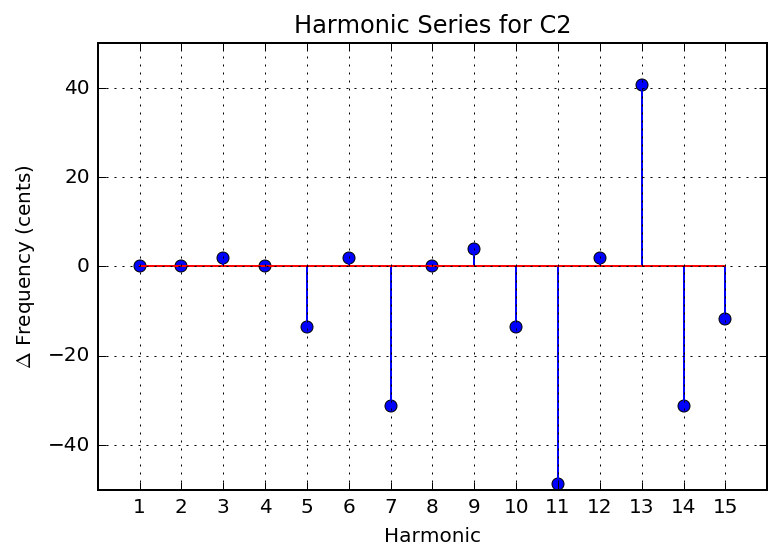

In [7]:
plt.stem(harmonics, diff)
plt.title('Harmonic Series for C2')
plt.xlabel('Harmonic')
plt.ylabel('$\Delta$ Frequency (cents)')
plt.xticks(harmonics)
plt.ylim([-50, 50])
plt.grid()

## Do the same for Bb4...

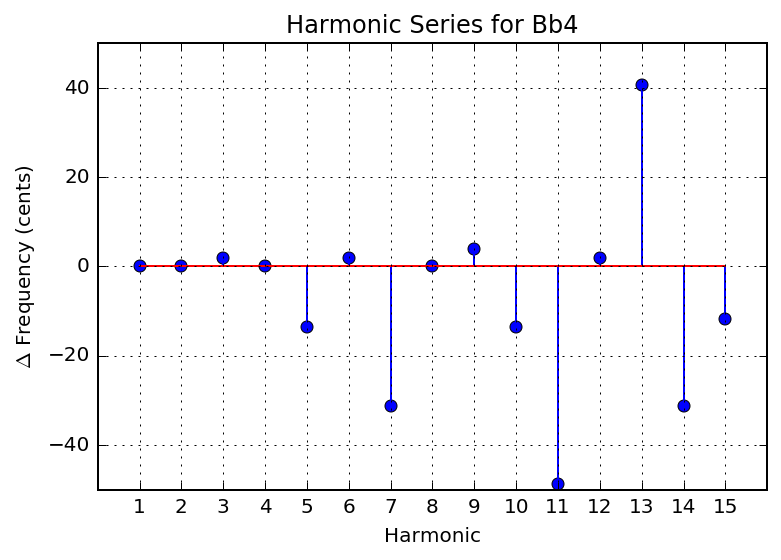

In [9]:
freq_Bb4 = freq_pitch(70)
freq_harmonics = freq_Bb4 * harmonics
closest_pitches, diff = harmonics_diff(harmonics, freq_harmonics, freq_pitches)

plt.figure()
plt.stem(harmonics, diff)
plt.title('Harmonic Series for Bb4')
plt.xlabel('Harmonic')
plt.ylabel('$\Delta$ Frequency (cents)')
plt.xticks(harmonics)
plt.ylim([-50, 50])
plt.grid()